In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# 动态添加 utils 文件夹到 sys.path
current_dir = os.getcwd()
utils_dir = os.path.join(current_dir, "utils")
if utils_dir not in sys.path:
    sys.path.append(utils_dir)

# 导入必要的模块
from rearrange_data import load_dataset, cut_slices, data_preparation, preprocess_data
from args_arguments import parse_arguments, read_config_file



In [7]:
def plot_column_distributions(x_data):
    """
    Plot the distribution of each column in the given data.

    Parameters:
    x_data (torch.Tensor or np.ndarray): Input data with columns to plot.

    Returns:
    None
    """
    if isinstance(x_data, torch.Tensor):
        x_data = x_data.cpu().numpy()  # Convert to NumPy array if it's a tensor

    # Determine the number of columns in the data
    num_columns = x_data.shape[1]

    # Create a histogram for each column
    plt.figure(figsize=(15, 5 * num_columns))
    for i in range(num_columns):
        column_data = x_data[:, i]  # Extract the data for the current column
        plt.subplot(num_columns, 1, i + 1)
        plt.hist(column_data, bins=50, alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of Column {i+1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# 设置计算设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 确认数据目录和配置文件路径
data_dir = os.path.abspath("data_dir/data_20240621")
config_dir = os.path.abspath("outputs/experiment8/config.yaml")

print(f"Data directory: {data_dir}")
print(f"Config directory: {config_dir}")

# 加载配置文件和数据
config = read_config_file(config_dir)
x_data, y_data, u_data = data_preparation(config, data_dir)

# 将数据转换为 PyTorch 张量并移动到设备
x_data = torch.tensor(x_data, dtype=torch.float32).to(device)
y_data = torch.tensor(y_data, dtype=torch.float32).to(device)
u_data = torch.tensor(u_data, dtype=torch.float32).to(device)

# 预处理数据
dataset, _ = preprocess_data(x_data, y_data, u_data, device, config)

x_data,_,_ = dataset



Data directory: /home/wushiqi/code/adaptive-combination/sensor_case/data_dir/data_20240621
Config directory: /home/wushiqi/code/adaptive-combination/sensor_case/outputs/experiment8/config.yaml
window_size: 150


In [9]:
x_data.shape

torch.Size([6258, 4])

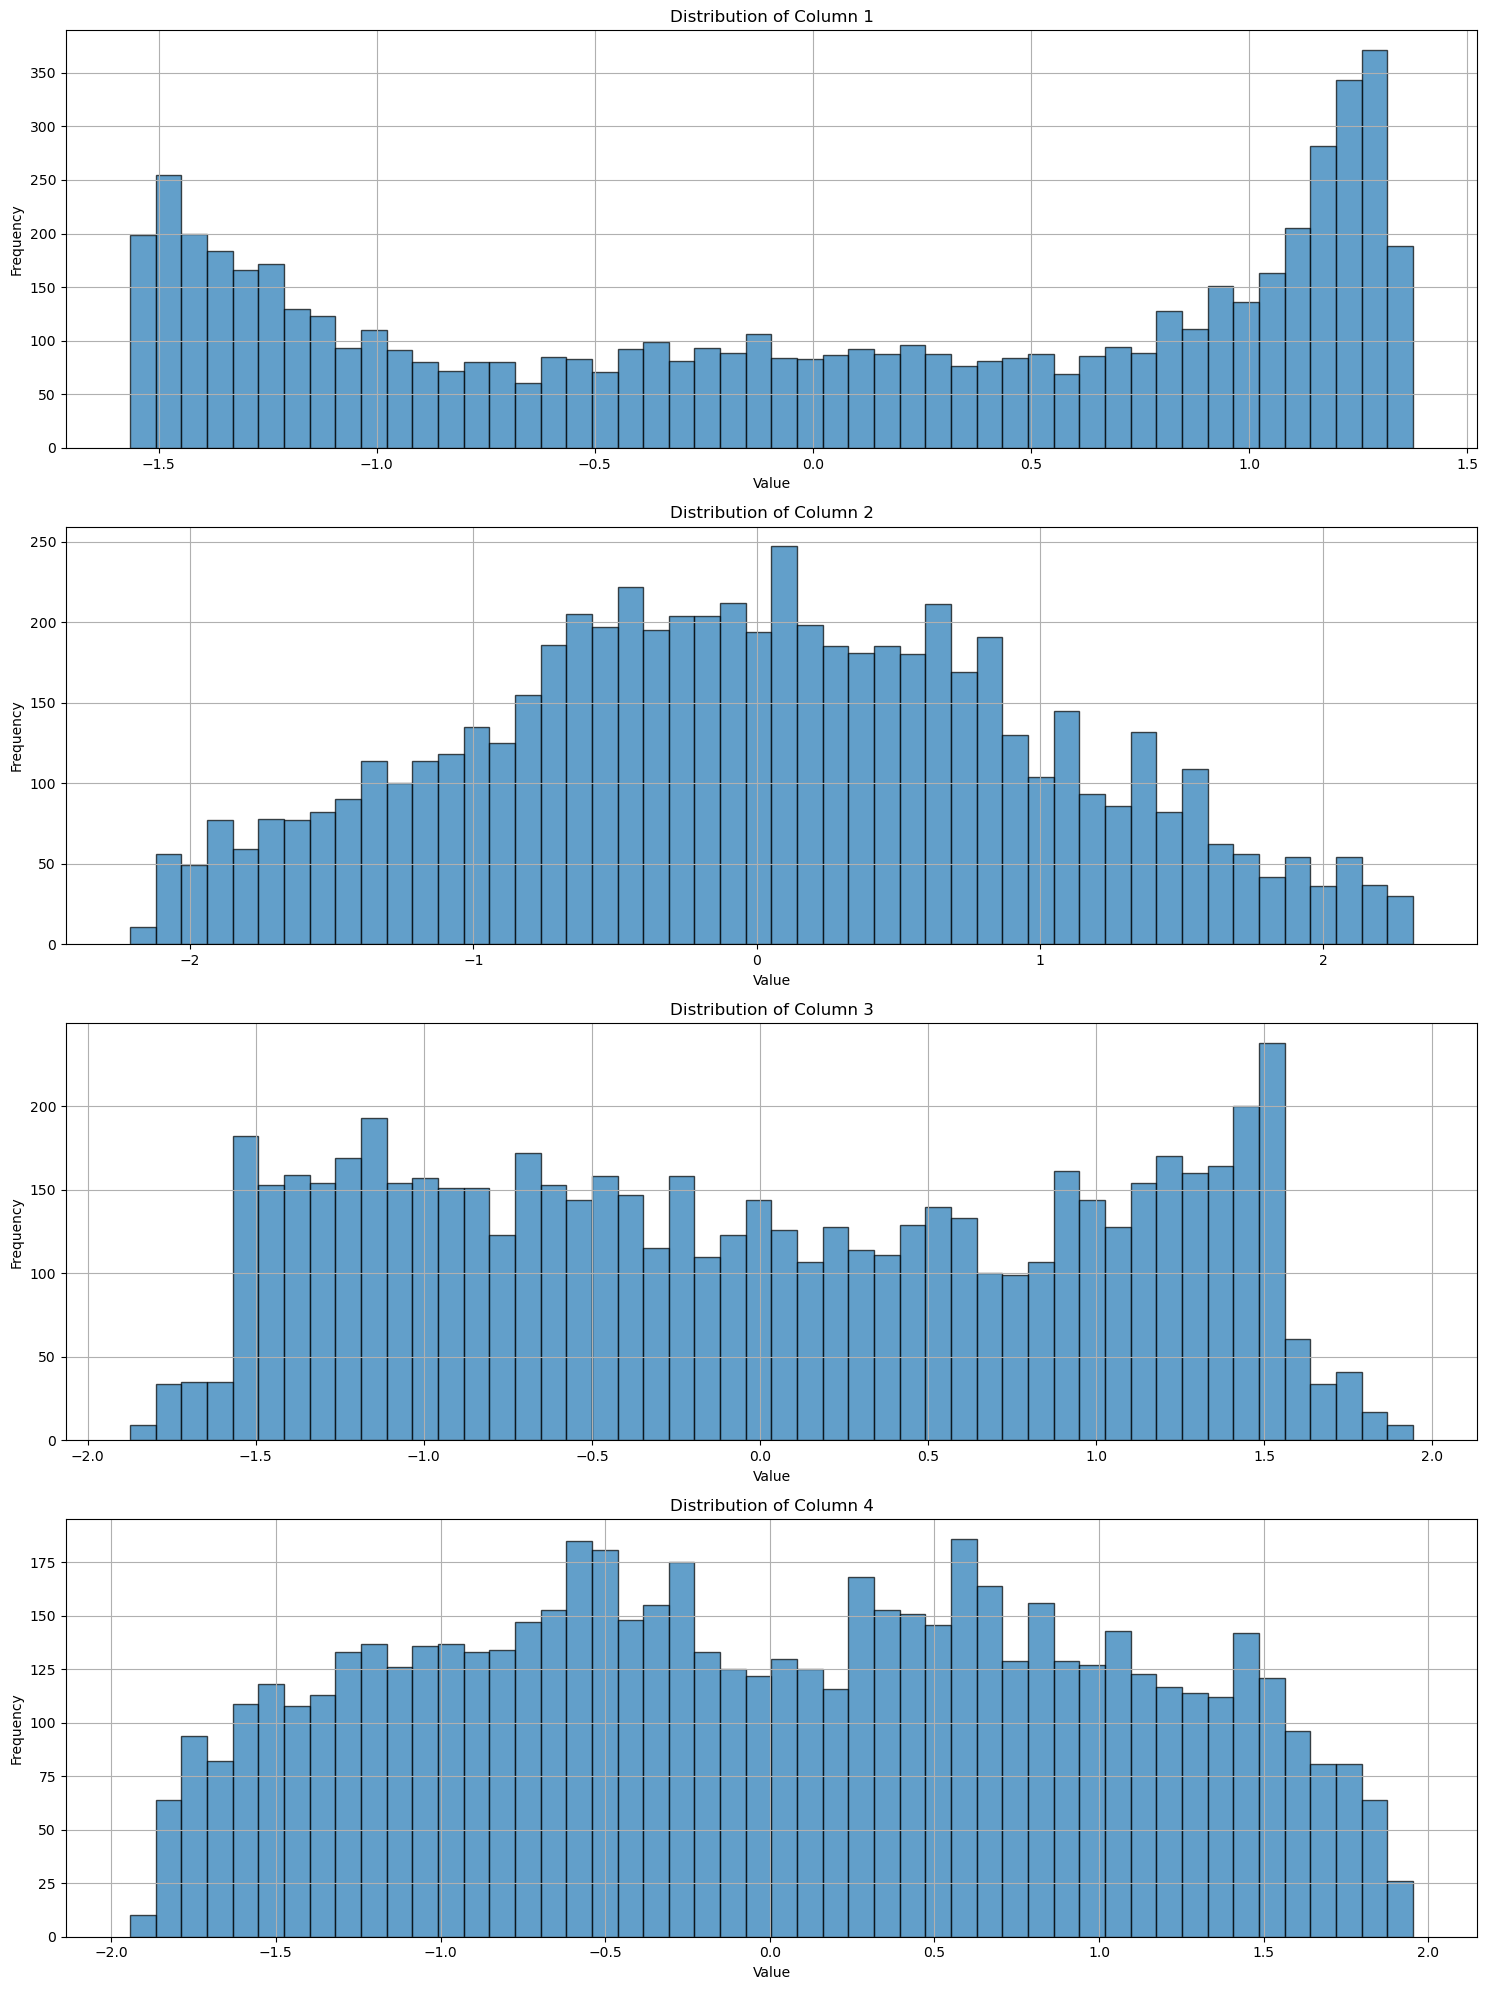

In [10]:
plot_column_distributions(x_data.cpu().numpy())  # 确保数据在 CPU 上进行可视化